In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from core import cluerun, clueutil, clueserializer
import random

In [2]:
run1 = cluerun.ClueRun("Analysis1", "data1.csv", "/home/user")
run2 = cluerun.ClueRun("Analysis2", "data2.csv", "/home/user")

run1.buildRound("Round1", "features.csv", "selection.csv", None)
print(len(run2.rounds))  # ← Prints 1! run2 sees run1's round!

0


In [ ]:




testfiles = "../../testfiles"

featuresFD = testfiles + "/features.csv"
featuresFD2 = testfiles + "/features2.csv"
selectionFD = testfiles + "/selection.csv"

clueConfig1 = cluerun.ClueConfig(distanceMetric=cluerun.DistanceMetric.ANGULAR, minPts=25, epsilon=0.05)
clueConfig2 = cluerun.ClueConfig(distanceMetric=cluerun.DistanceMetric.EUCLIDEAN, epsilon=10, useFeatures=True, standardize=True)
clueConfig3 = cluerun.ClueConfig(algorithm=cluerun.Algorithm.KMEANS)

clueRun1 = cluerun.ClueRun("run1", testfiles + "/input.csv", testfiles, CLUECLUST="external/CLUECLUST.jar")
clueRun1.buildRound("Round1", featuresFD, selectionFD, clueConfig1)
clueRun1.buildRound("Round2", featuresFD2, selectionFD, clueConfig2)
clueRun1.buildRound("Round3", featuresFD, selectionFD, clueConfig3)

#clueserializer.serialize_cluerun(clueRun1, "clueRun1.xml")

clueRun2 = clueserializer.deserialize_cluerun("../../Demo/Demo_Run_1.xml")

#clueRun1.run()
clueRun2.run()

Building base features file...
baseFeatures file written to /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/Demo/Demo_Run_1/baseFeatures.csv
Filtering input data for round: KMeans_1...
No features file provided, accepting all features...
Running round: KMeans_1...
Using CLUECLUST jar file: /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/CLUE-CORE/src/external/CLUECLUST.jar
Target round directory: /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/Demo/Demo_Run_1/KMeans_1/
Input File: /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/Demo/Demo_Run_1/KMeans_1/input.csv
Clusters File: /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/Demo/Demo_Run_1/KMeans_1/clusters.csv
Metadata File: /home/flaskposto/Documents/Projects/CLUE/CLUE-Core/Demo/Demo_Run_1/KMeans_1/metadata.csv
Feature Selection File: 
Cluster Selection File: 
Reading input dataset in CSV format...
Reading data took: 0.232608506 seconds
Performing K-Means clustering with k=5, maxIterations=100
Dataset dimensions: 24
Da

In [14]:
testfiles = "../testfiles/"

paramOptFD = testfiles + "optimal_params.csv"
baseFeaturesFD = testfiles + "baseFeatures.csv"
inputFD = testfiles + "input.csv"
outputFD = testfiles + "output.csv"
metadataFD = testfiles + "metadata.csv"
featuresFD = testfiles + "features2.csv"
selectionFD = testfiles + "selection.csv"
graphsDirectory = testfiles + "graphs"
call = ["java", "-jar", "Java-PH/Main.jar", "-I", "-O", "-M", "-i", inputFD, "-o", outputFD, "-m", metadataFD]

0.22788535969157675
0.10500215104453339
0.15500586367382385
0.14464214762976454
[[1.22788536 0.10500215 0.15500586 1.14464215]
 [0.52851827 0.26330857 0.80400702 0.99716775]
 [0.7664534  0.75523871 0.62966328 0.44080483]
 [0.22788536 1.10500215 1.15500586 0.14464215]
 [0.92369232 0.33384106 0.43649835 0.91954937]]


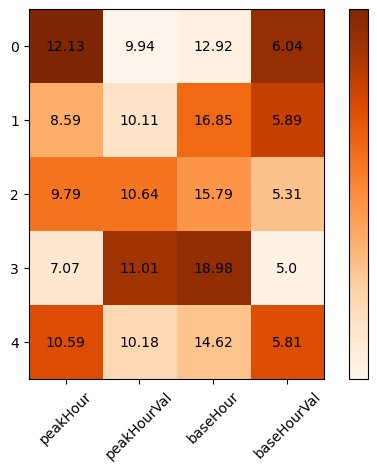

In [15]:
inputDF = pd.read_csv(inputFD, header=0)
metadataDF = pd.read_csv(metadataFD, header=0)
outputDF = pd.read_csv(outputFD, header=0)
featuresDF = pd.read_csv(featuresFD, header=0)
baseFeaturesDF = pd.read_csv(baseFeaturesFD, header=0)
try:
    featuresDF = pd.read_csv(featuresFD, header=0)
except pd.errors.EmptyDataError:
    print("FAILED")

selectionFile = open(selectionFD)
commands = []
for line in selectionFile:
    command = line.rstrip().split(":")
    commands.append(command)

selectionFile.close()
selectedFeatures = []
for f1_i in range(len(inputDF.columns.array)):
    for f2 in featuresDF:
        if (inputDF.columns[f1_i] == f2):
            selectedFeatures.append(f2)
            
selected = inputDF[selectedFeatures]
selected1 = inputDF

df = metadataDF

for command in commands:
    if (command[0] == "IN"):
        #df = metadataDF.loc[metadataDF["SIZE"] > int(command[1])]
        df = metadataDF.loc[metadataDF["CLUSTERID"].isin(map(int, command[1].split(",")))]
        #df = df.drop(map(int, command[1].split(',')))
df = outputDF[outputDF.iloc[:, 1].isin(map(int, (df["CLUSTERID"])))]   

paramOptDF = pd.read_csv(paramOptFD, header=0)
bestParam = paramOptDF.iloc[0]
#print(bestParam)
#dict1 = {
#    1: [1, 2, 3],
#    2: [4, 5, 6]
#}
#d = dict1[1]
#d += dict1[2]

def hello():
    print("hello")

d = {
    1: hello
}

line1 = selected.iloc[0]
line2 = selected.iloc[1]

class FeatureExtractor:
    def __init__(self):
        pass
    
    def __peakHour():
        print("Hello World!")
        
    featuresDict = {
        "peakHour" : __peakHour
    }
    def extract(line):
        pass

s = clueutil.FeatureExtractor.extractFromDataFrame(selected)
cdf = [col for col in metadataDF.columns if 'AVG' in col]
def test1():
    for i in range(len(metadataDF)):
        plt.plot(metadataDF[cdf].iloc[i])
def test2():
    plt.plot(metadataDF[cdf].iloc[0])

cl1 = cluerun.ClueRound("Round3", 
                        3, 
                        "../testfiles/run1",
                        featuresFD,
                        selectionFD,
                        None
                       )

#print(cl1.roundDirectory + cl1.metadataFile)

#cluerun.ClueGraphing.generateGraphs(cl1)
#n = (inputDF.loc[inputDF["ID"].isin(map(int, outputDF.iloc[:, 0].array))])

newDF = clueutil.InputFilter.filter(baseFeaturesDF, None, None, None, None)
clusters = outputDF.iloc[:, 1].unique()
newDFs = {}
for cluster in clusters:
    newDF1 = outputDF.loc[outputDF.iloc[:, 1] == cluster].iloc[:, 0]
    newDF2 = newDF.loc[newDF["ID"].isin(map(int, newDF1.array))]
    newDFs[cluster] = newDF2
    
avgs = []
for dfnew in newDFs.values():
    avg = []
    for col in dfnew.columns[1:len(dfnew.columns)]:
        avg.append(dfnew[col].mean())
    avgs.append(avg)

random.seed(42)

yaxis = list(newDFs.keys())
headers = clueutil.FeatureExtractor.headers()
xaxis = headers[1:len(headers)]
    
avgst = np.transpose(avgs)
normAvgs = []
for avg in avgst:
    r = random.uniform(0.1, 0.3)
    print(r)
    nAvg = (avg - np.min(avg))/np.ptp(avg) + r
    normAvgs.append(nAvg)
    
avgstt = np.transpose(normAvgs)

print(avgstt)
    
h = plt.imshow(avgstt, cmap="Oranges")
plt.colorbar(h, ticks=[])
plt.yticks(ticks=np.arange(len(yaxis)), labels=yaxis)
plt.xticks(ticks=np.arange(len(xaxis)), labels=xaxis, rotation=45)
for i in range(len(avgs)):
    for j in range(len(avgs[i])):
        text = plt.text(j, i, round(avgs[i][j], 2),
                       ha="center", va="center", color="black")
#df = outputDF.loc[outputDF["CLUSTERID"].isin(map(int, df["CLUSTERID"].array))]["ID"]
#newDF = cluerun.InputFilter.parseSelection(commands, outputDF, metadataDF)
#print(inputDF)
#newDF = cluerun.InputFilter.filter(inputDF, outputDF, metadataDF, featuresFD, selectionFD)
#newDF = selected.loc[selected["ID"].isin(newDF.array)]

#clueRound1 = ["Round1", 1, featuresFD, outputFD]
#clueRound2 = ["Round2", 1, featuresFD, outputFD]
#clueRun1 = cluerun.ClueRun("run1", "testfiles/input.csv", "testfiles", )
#clueRound1 = cluerun.ClueRound("Round1", 
#                               1, 
#                               "testfiles", 
#                               featuresFD, 
#                               outputFD)
#clueRound2 = cluerun.ClueRound("Round2", 
#                               2, 
#                               "testfiles", 
#                               featuresFD, 
#                               outputFD)
#clueRun1.buildRound("Round1", 1, featuresFD, outputFD)
#clueRun1.buildRound("Round2", 2, featuresFD, outputFD)
#clueRun1.buildRoundFromList(clueRound1)
#clueRun1.buildRoundFromList(clueRound2)
#clueRun1.run(featuresFD, selectionFD)

ar = metadataDF.drop(columns="CLUSTERID").to_numpy()
plt.plot(ar[0])
plt.plot(ar[1])
plt.plot(ar[2])
plt.plot(ar[3])
plt.plot(ar[4])
plt.show

In [ ]:
ar = metadataDF.drop(columns="CLUSTERID").to_numpy()
plt.plot(ar[0])
plt.plot(ar[1])
plt.plot(ar[2])
plt.plot(ar[3])
plt.plot(ar[4])
plt.show

In [ ]:
c = cr.ClueRound("Test1")
cl = cr.ClueRun([cr])
cl